In [3]:
#Newton Raphson
n = 100
x =0.1
while(abs(x**2 - n)>0.00001):
    x = x-((x**2-n)/(2*x))

print(x)


10.000000025490744


In [9]:
#Klinkenberg Effect - solving using Newton Raphson

k = float(input("Enter your first guess of absolute permeability: "))

#f(k = kl) = 6.9kl^(0.64) +pmkl - pm*kg=0
#f'(k) = 4.416kl^(-0.36) + pm

pm = float(input("Enter mean pressure: "))

kg= float(input("Enter k(air): "))

while abs(6.9*(k**0.64) + pm*k -pm*kg)>0.01:
    k = k - (6.9*(k**0.64) + pm*k -pm*kg)/(4.416*(k**(-0.36))+ pm)

print(k)

22.849002024346692


In [4]:
# Pwf Nodal Analysis
#  Pe - delP_r = Pwf(IPR)
#  pwf(TPR) = P_sep + delp_t +delP_sl 
#sl -surface lines , t - tubing, r - reservoir , delp -  loss in pressure

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


      Pwf     Q
0  4000.0     0
1  3500.0  1999
2  3000.0  3094
3  2500.0  3902
4  2000.0  4512
5  1500.0  4963
6  1000.0  5275
7   500.0  5458
8    14.7  5519


Text(0.5, 1.0, 'IPR curve')

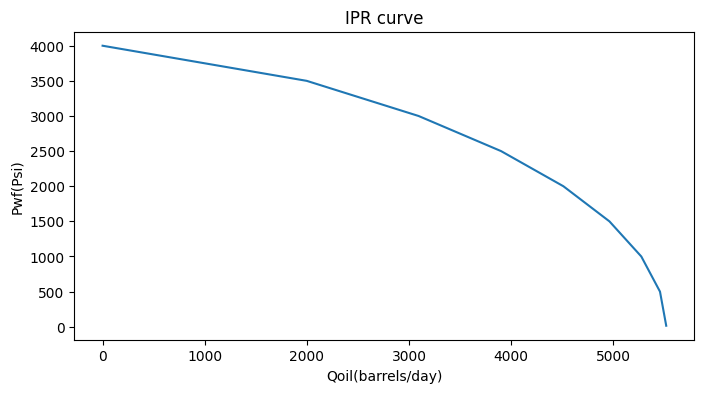

In [5]:
#Getting IPR Dataset (Source: Petrowiki)
q_ipr = [0,1999,3094,3902,4512,4963,5275,5458,5519]  #Flow rates 
pwf_ipr = [4000,3500,3000,2500,2000,1500,1000,500,14.7]  # pwf

ipr_df = pd.DataFrame({'Pwf':pwf_ipr,
                    'Q':q_ipr})

print(ipr_df)
plt.figure(figsize=(8,4))
plt.plot(q_ipr ,pwf_ipr)
plt.xlabel("Qoil(barrels/day)")
plt.ylabel("Pwf(Psi)")
plt.title("IPR curve")

       q  Pwf(1.90 tbg)  Pwf(2.375 tbg)  Pwf(2.875 tbg)
0   1000           1334            1298            1286
1   1500           1400            1320            1294
2   2000           1487            1351            1305
3   2500           1592            1390            1319
4   3000           1712            1435            1336
5   3500           1843            1487            1356
6   4000           1984            1545            1378
7   4500           2132            1609            1403
8   5000           2287            1677            1431
9   5500           2446            1749            1461
10  6000           2609            1824            1493


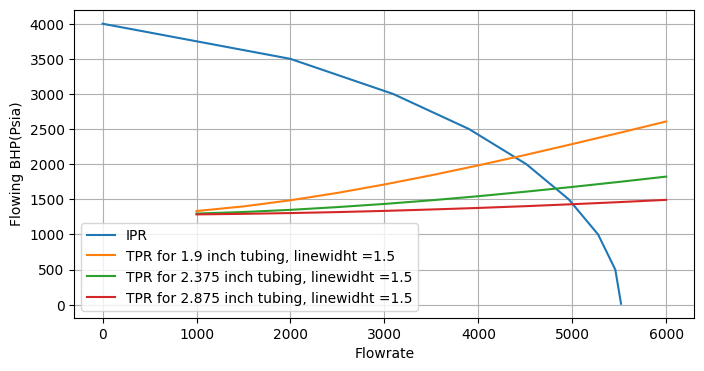

In [13]:
#TPR data

q_tpr = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]

p_190 =[1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609] # tpr pressures for 1.90 inches production tubing
p_2375 = [1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824] #tpr pressures for 2.375 inch production tubing
p_2875 = [1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493] #tpr pressures for 2.875 inch production tubing

#Larger the tubing size the curve intersect more and more towards the right side 
tpr_df = pd.DataFrame({'q':q_tpr , 'Pwf(1.90 tbg)': p_190, 'Pwf(2.375 tbg)':p_2375,'Pwf(2.875 tbg)':p_2875 })
print(tpr_df)
 
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.plot(ipr_df['Q'],ipr_df['Pwf'],label = 'IPR' ,linewidth =1.5)

plt.plot(tpr_df['q'],tpr_df['Pwf(1.90 tbg)'],label="TPR for 1.9 inch tubing, linewidht =1.5")
plt.plot(tpr_df['q'],tpr_df['Pwf(2.375 tbg)'],label="TPR for 2.375 inch tubing, linewidht =1.5")
plt.plot(tpr_df['q'],tpr_df['Pwf(2.875 tbg)'],label="TPR for 2.875 inch tubing, linewidht =1.5")

plt.xlabel("Flowrate")
plt.ylabel("Flowing BHP(Psia)")
plt.grid(True)
plt.legend(loc = 'best')



In [2]:
#Analyzing Practical Well Log Data
import welly
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
well = welly.Well.from_las('C:\\Users\\SARTHAK MAHESHWARI\\Downloads\\15-9-19_SR_COMP.LAS')
well

Well(uwi: '', name: '15/9-19', 7 curves: ['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED'])


In [22]:
df = well.df()
df

c:\Users\SARTHAK MAHESHWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340000000,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941000000,0.8359000000
3615.5864000000,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367000000,0.8028000000
3615.7388000000,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423000000,0.7958000000
3615.8912000000,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571000000,0.7929000000
3616.0436000000,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442000000,0.7940000000
...,...,...,...,...,...,...,...
4635.9043999996,NaN,NaN,NaN,NaN,NaN,0.7728999997,0.5977999999
4636.0567999996,NaN,NaN,NaN,NaN,NaN,0.8368999998,0.6256999999
4636.2091999996,NaN,NaN,NaN,NaN,NaN,0.8740999999,0.6887999998


c:\Users\SARTHAK MAHESHWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


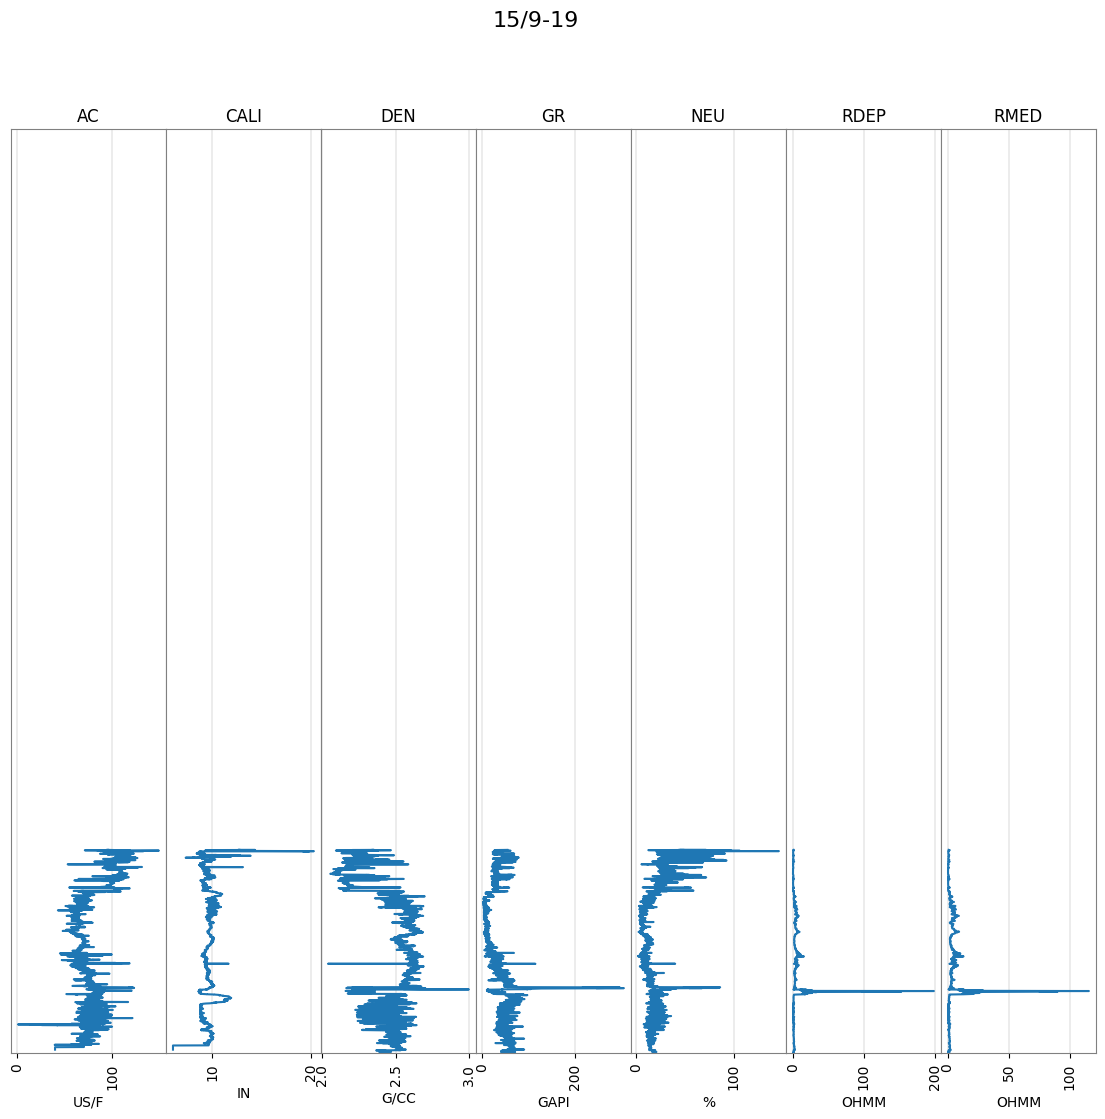

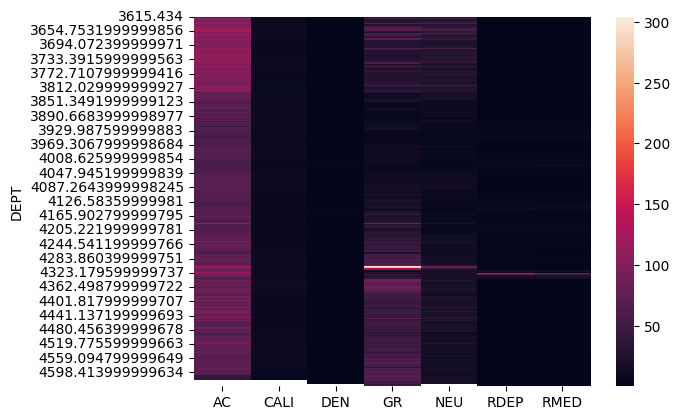

In [ ]:
sns.heatmap(df) #isna identifies null values  
#gamma rays are going from 102 feet to 4000 feet
well.count_curves()
well.plot()



c:\Users\SARTHAK MAHESHWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


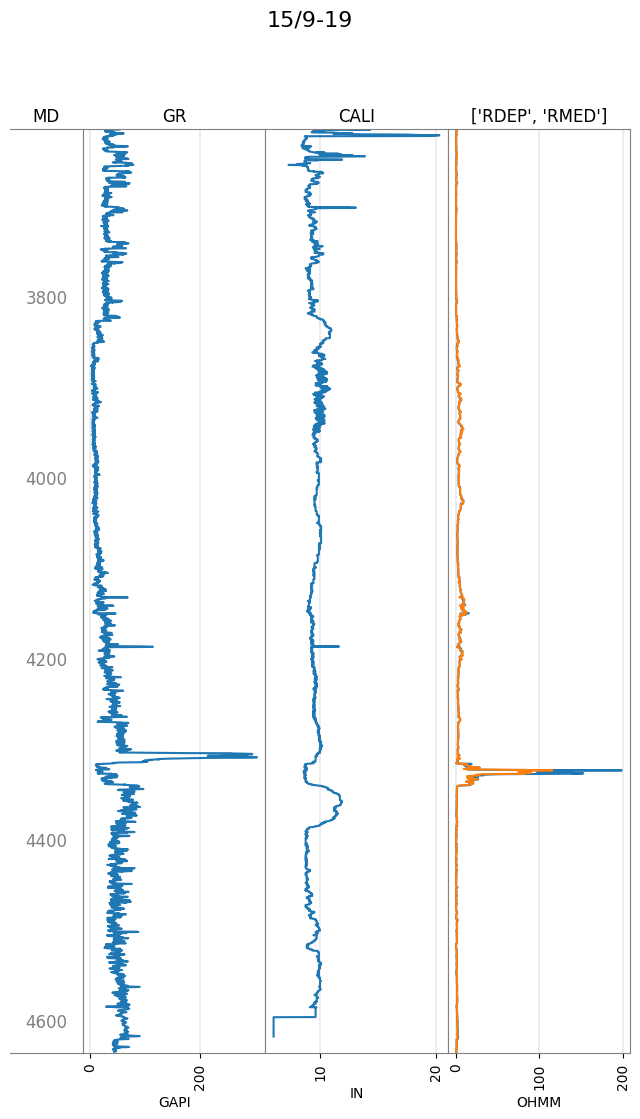

In [ ]:
tracks = ['MD','GR','CALI',['RDEP','RMED']]
well.plot(tracks=tracks)
#Combining RDEP and RMED  as they are geenrally same same
#FOr that make another list in tracks


c:\Users\SARTHAK MAHESHWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\SARTHAK MAHESHWARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


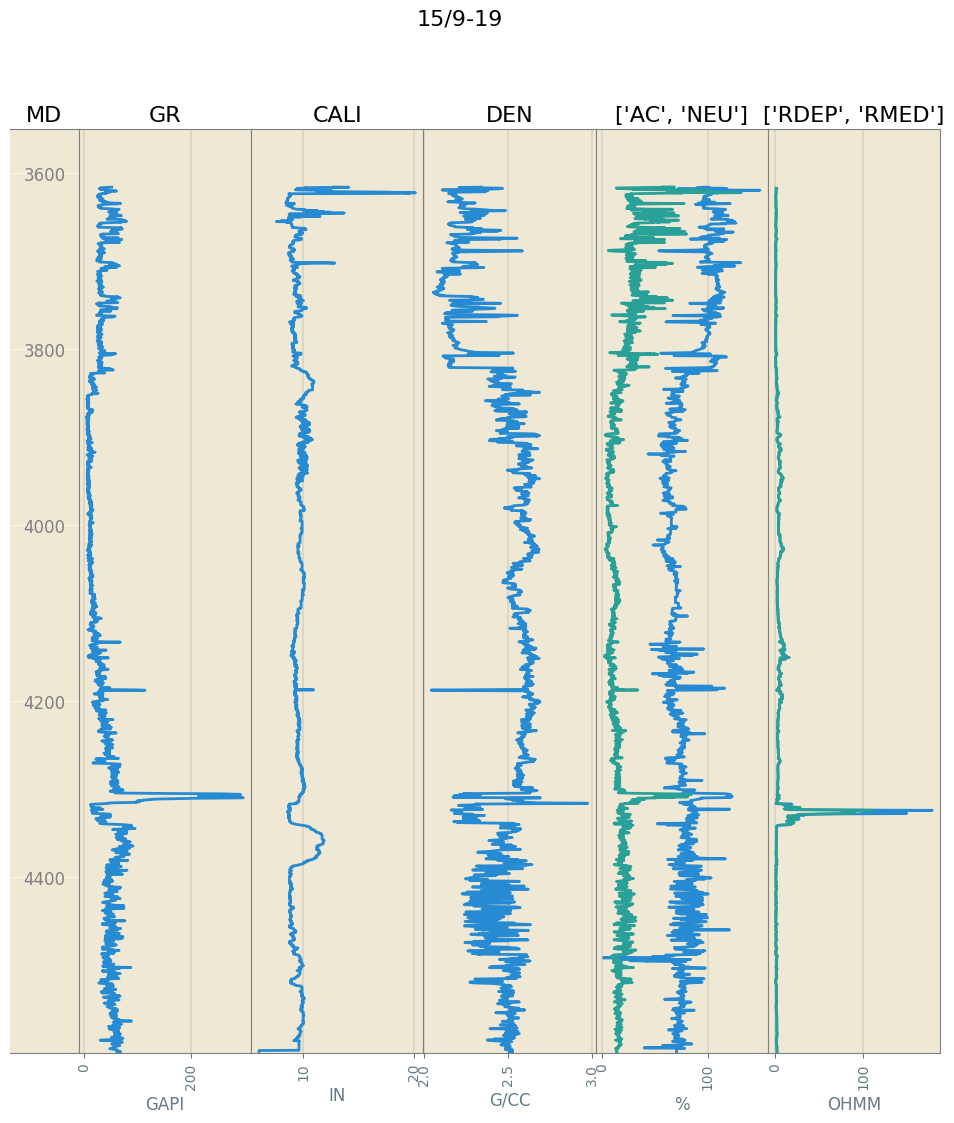

In [ ]:
# to take a range of depth and only show the plot for that range
well.unify_basis(start = 3550, stop=4600)
tracks= ['MD','GR','CALI','DEN',['AC','NEU'],['RDEP','RMED']]
plt.style.use('Solarize_Light2')
well.plot(tracks=tracks)


In [ ]:
#Darcy Law 
re = 3000
rwf = 0.5 # radius is in feet
pwf = 1500 # pressure in psi 
h = 60 #Net pay thickness
k = 150  #Permeability is 150mili darcy
q = 200 # stb/day -stock tank barrel
mu = 15 #centipoise
B =1 #rb/stb

r = np.linspace(rwf,re,500) #start, end , no of points
pressure= []
for i in range(len(r)):
    p = pwf + (141.2*q*mu*B*(np.log(r[i]/rwf))/k/h)
    pressure.append(p)
pressure



[1500.0,
 1620.8033597371423,
 1651.5846857270926,
 1670.0379196705821,
 1683.259629867649,
 1693.5700975388877,
 1702.0228246060683,
 1709.1861529560506,
 1715.4018894828337,
 1720.8916977045928,
 1725.8075442513064,
 1730.2581658945219,
 1734.3240554386591,
 1738.0664686936216,
 1741.533104670168,
 1744.7618326163135,
 1747.7832202159282,
 1750.622297852136,
 1753.2998202215017,
 1755.8331879230695,
 1758.2371333908773,
 1760.5242399760295,
 1762.7053406300429,
 1764.78982822017,
 1766.7858999864486,
 1768.7007522322829,
 1770.5407369321217,
 1772.3114888598511,
 1774.0180296559024,
 1775.6648536778423,
 1777.255999331835,
 1778.7951087354127,
 1780.2854779297452,
 1781.7300993827241,
 1783.1316981609734,
 1784.4927628697858,
 1785.8155722436563,
 1787.102218101098,
 1788.3546252444298,
 1789.5745687798171,
 1790.7636892487644,
 1791.9235058947474,
 1793.055428334159,
 1794.1607668564843,
 1795.240741542477,
 1796.2964903594582,
 1797.3290763684204,
 1798.339494157368,
 1799.32867559

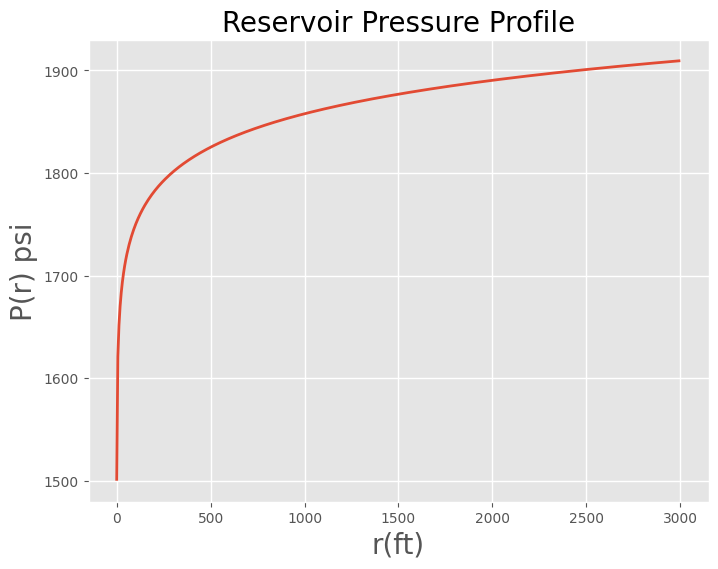

In [51]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(r,pressure)
plt.xlabel('r(ft)',size =20)
plt.ylabel('P(r) psi',size =20)
plt.title('Reservoir Pressure Profile',size =20)
plt.grid(True)

In [1]:
#Dynamic Pressure profile , create a GUI , where we vary different parameters to show differnce in pressure
#Earlier we were varying only r , now (mu, k and all other values vary)
from ipywidgets import interact, interactive
from IPython.display import display

def flowprofile(k,mu,q):
    re = 3000
    rw = 0.5 # radius is in feet
    pe = 4000 # pressure in psi 
    h = 30 #Net pay thickness
    B =1 #rb/stb

    r= np.linspace(rw,re,500)

    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    y_min =P[np.where(r == rw)]
    plt.plot(r,P,linewidth = 4)
    plt.axhline(y_min,linewidth =3,color='red')  # draws a line horizontal 

    plt.ylim(0,5000)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r) Psi') 
    plt.title('Dynamic Pressure Profile')
    plt.grid(True)

    return r,P



In [3]:
w = interactive(flowprofile, k =(200,1000), mu=(10,220), q =(100,200))# first parameter is function name, other parameters are parameter of the function and their range
display(w) 

interactive(children=(IntSlider(value=600, description='k', max=1000, min=200), IntSlider(value=115, descripti…